# NumPy Tutorial

https://www.w3schools.com/python/numpy/

## Pareto Distribution

The W3 description only states little, only that it is the distribution that aligns with the so-called 80-20 rule (20% of factors cause 80% of outcomes).

The probability distribution function (pdf) is monotonically decreasing, so Pareto distributions may represent survival curves.

It takes parameter `a` which is the shape parameter. It can be arbitrarily large, representing steeper drop-offs in 'survival'.

See the [Wikipedia article here](https://en.wikipedia.org/wiki/Pareto_distribution).

It is a 'power-law'  distribution. Only when the value of $\alpha$ is $\log_45\approx1.16$ does the distribution follow the 80-20 distribution.

In [1]:
import numpy as np
from configurations import printer

as_to_cycle_through = [0.1, 0.5, 1, 2, 4]
for a in as_to_cycle_through:
    size = 10
    my_array = np.random.pareto(a=a, size=size) # type: ignore
    printer(
        'This is an array from a Pareto distribution of size %s with\n'
        'shape parameter a %s\n:%s\n',
        size,
        a,
        my_array
    )

This is an array from a Pareto distribution of size 10 with
shape parameter a 0.1
:[1.88655519e+01 1.24375098e+02 5.07124236e+03 3.27775731e+07
 1.36849232e+08 3.81585753e+05 6.62560865e+05 5.11634660e+09
 7.91208249e+01 9.29067474e+11]

This is an array from a Pareto distribution of size 10 with
shape parameter a 0.5
:[2.74948105e+03 5.36006110e-02 5.01620519e+02 1.93717289e+01
 1.51073283e-01 3.88992324e+00 5.70898661e-01 2.03405994e+01
 3.35414625e-02 3.88883631e-01]

This is an array from a Pareto distribution of size 10 with
shape parameter a 1
:[ 0.43558705  1.85009915  0.51889637  2.28189466  7.48638864  1.97229965
  0.57457555  4.04162959  0.13481583 32.22537926]

This is an array from a Pareto distribution of size 10 with
shape parameter a 2
:[ 0.15296012  3.12374183  0.45193391  1.28529357  1.8614238   0.33112886
  2.43346225  0.19702968  1.20448211 11.68382489]

This is an array from a Pareto distribution of size 10 with
shape parameter a 4
:[0.22225539 0.23387034 0.20511937

### Visualization of the Pareto distribution

Observe that the Kernel-density estimates (at least the default kernels) are not helpful for Pareto since they will not reflect monotonically-decreasing nature of the Pareto distributions.


2023-08-26 22:49:07 
	Logger: numpy-tutorial Module: 1608675773 Function: <module> File: 1608675773.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-26 22:49:07 
	Logger: numpy-tutorial Module: 1608675773 Function: <module> File: 1608675773.py Line: 13
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



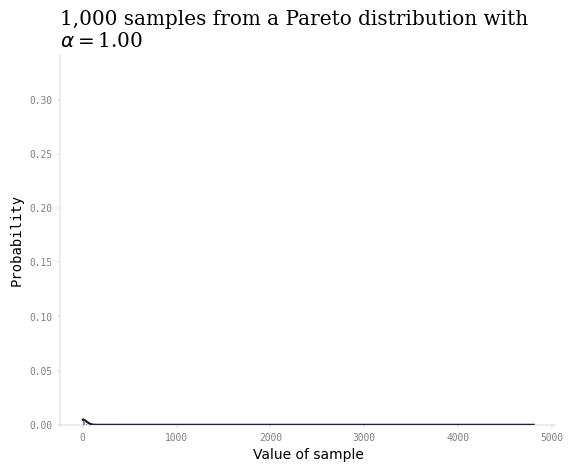

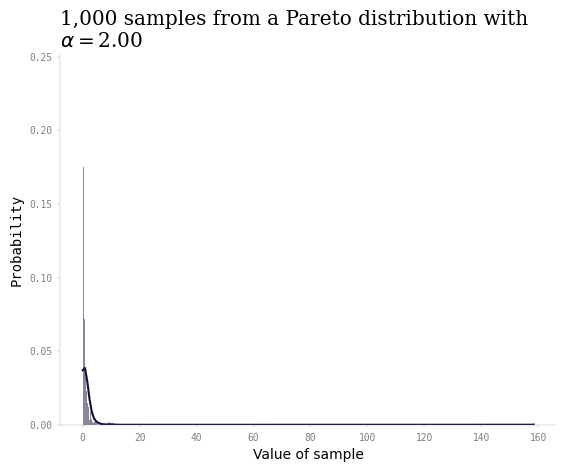

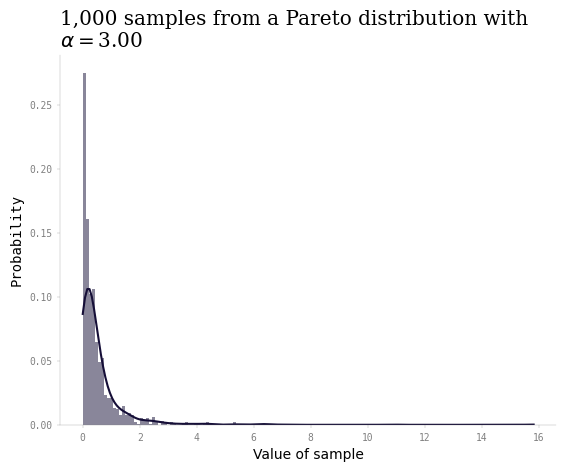

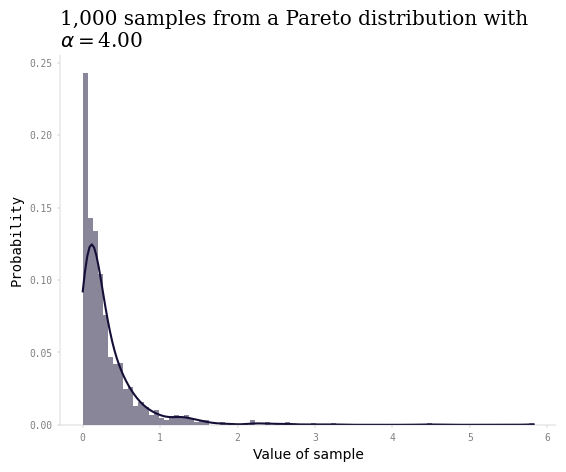

In [2]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_pareto(
        a: float = 1,
        size: int = 1_000
    ) -> None:

    my_pareto = np.random.pareto(a=a, size=size) # type: ignore
    
    ax = plt.subplots()[1] # type: ignore
    
    sns.histplot( # type: ignore
        my_pareto,
        ax=ax,
        stat='probability',
        edgecolor='None',
        kde=True
        )
    
    plt.title( # type: ignore
        label=f'{size:,} samples from a Pareto distribution with\n'
        fr'$\alpha=${a:,.2f}',
        family='serif'
        )
    
    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore

as_to_cycle_through = [1, 2, 3, 4]
for a in as_to_cycle_through:
    plot_pareto(a=a)

Recall that the Pareto distribution only reflects the so-called 80-20 rule when $a=\log_45\approx1.16$

To get `logn`, import `numpy.emath`.


2023-08-27 00:25:36 
	Logger: numpy-tutorial Module: 1295482350 Function: <module> File: 1295482350.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-27 00:25:36 
	Logger: numpy-tutorial Module: 1295482350 Function: <module> File: 1295482350.py Line: 13
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



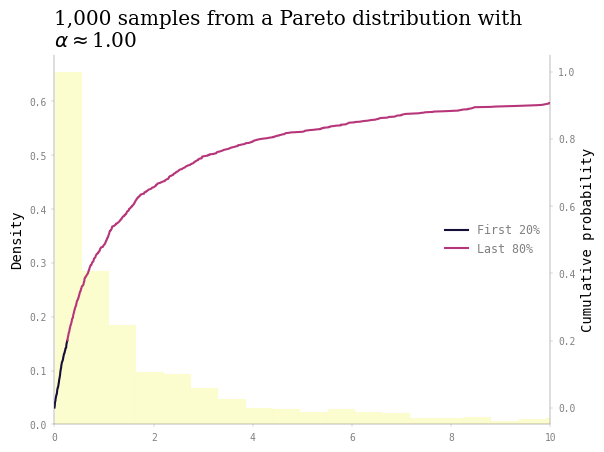

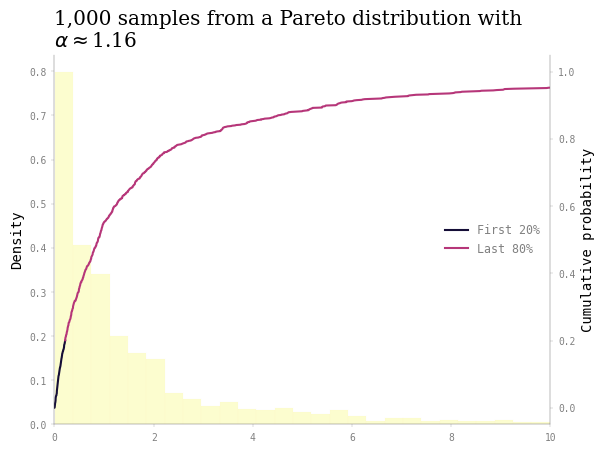

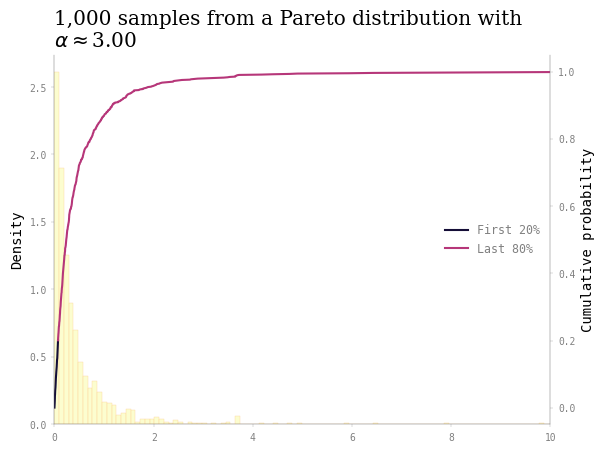

In [12]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer]
            )

def plot_pareto(
        a: float = 1,
        size: int = 1_000
    ) -> None:

    my_pareto = np.random.pareto(a=a, size=size) # type: ignore
    
    ax = plt.subplots()[1] # type: ignore
    
    sns.histplot( # type: ignore
        x=my_pareto,
        ax=ax,
        stat='density',
        edgecolor=choose_my_color(8),
        color=choose_my_color(9)
        )

    sorted_pareto = np.sort(my_pareto)
    cutoff = np.percentile(sorted_pareto, 20)
    group = [
        'First 20%' if value <= cutoff
        else 'Last 80%'
        for value in sorted_pareto
        ]
    cumulative_pareto = (
        np.arange(1, len(sorted_pareto) + 1) / len(sorted_pareto)
        )
    
    ax2 = ax.twinx()

    sns.lineplot( # type: ignore
        x=sorted_pareto,
        y=cumulative_pareto,
        hue=group,
        palette=[choose_my_color(0), choose_my_color(4)],
        ax=ax2
        )
    
    ax2.set_ylabel('Cumulative probability') # type: ignore
    
    sns.despine(right=False) # type: ignore

    plt.title( # type: ignore
        label=f'{size:,} samples from a Pareto distribution with\n'
        fr'$\alpha\approx${a:,.2f}',
        family='serif'
        )
    
    ax.set_xlim(0, 10)

    ax2.legend(loc='center right') # type: ignore
    
    plt.xlabel(  # type: ignore
        xlabel='Value of sample (Truncated at 10)',
        family='sans-serif'
        )

as_to_cycle_through = [1, np.emath.logn(4, 5), 3]
for a in as_to_cycle_through:
    plot_pareto(a=a)